In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [14]:
with open('res_array_all.npy', 'rb') as f:
    res_array_all = np.load(f, allow_pickle=True) 
    # print(res_array_all)
    # print("------------------------------------")

normal_cw_ece = np.array(res_array_all[:,-3])
a_normal_cw_ece = []
for i in normal_cw_ece:
    a_normal_cw_ece.append(i)
normal_cw_ece = np.array(a_normal_cw_ece)

sk_iso_cw_ece = np.array(res_array_all[:,-2])
a_sk_iso_cw_ece = []
for i in sk_iso_cw_ece:
    a_sk_iso_cw_ece.append(i)
sk_iso_cw_ece = np.array(a_sk_iso_cw_ece)

dir_cw_ece    = np.array(res_array_all[:,-1])
a_dir_cw_ece = []
for i in dir_cw_ece:
    a_dir_cw_ece.append(i)
dir_cw_ece = np.array(a_dir_cw_ece)


print("------------------------------------ ens")
# each row is a run of the ensemble
# colomn is ens ECE values for a class

print("Ens normal_cw_ece \n", normal_cw_ece[0])
# print("Ens sk_iso_cw_ece \n", sk_iso_cw_ece.mean(axis=0).sum())
# print("Ens dir_cw_ece \n", dir_cw_ece.mean(axis=0).sum())

------------------------------------ ens
Ens normal_cw_ece 
 [0.00685395 0.01015669 0.02045876 0.0194689  0.02843588 0.02008855
 0.02730953 0.0135765  0.01343385 0.01015331]


In [15]:
print("------------------------------------ members ")
# each row is a member of the ensemble
# colomn is member ECE values for a class

main_df = pd.DataFrame(columns=['run','member','Class','ECE'])

for run_index in range(10):
    with open(f"mem_run{run_index}_normal_cw_ece.npy", 'rb') as f:
        raw_data = np.load(f, allow_pickle=True) 
        # print(raw_data)

        # convert all member data into DataFrame with coloms 'run','member','Class','ECE'
        for mem_index, member_raw in enumerate(raw_data):
            # print(member_raw)
            # print(mem_index)
            # print("------------------------------------")
            member_data = ({
            'run': np.full(len(member_raw), run_index),
            'member' :np.full(len(member_raw), mem_index),
            'Class': range(10),
            'ECE': member_raw
            })

            df = pd.DataFrame(member_data)
            main_df = pd.concat([main_df, df])

------------------------------------ members 


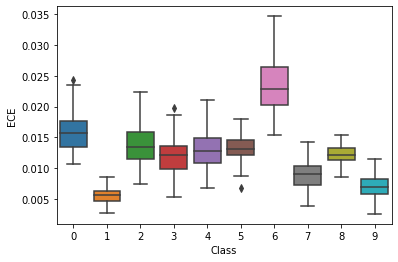

In [16]:
ax = sns.boxplot(x="Class", y="ECE", data=main_df)